<a href="https://colab.research.google.com/github/pedrohortencio/machine-learning-gladiator/blob/main/MNIST/MNIST_Gladiator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing packages and libraries

In [1]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_theme()

In [2]:
!pip install -q kaggle

In [3]:
# changes the directory in which the kaggle.json file is stored
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 17.9MB/s]
100% 6.09M/6.09M [00:00<00:00, 20.3MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.2MB/s]
 55% 5.00M/9.16M [00:00<00:00, 6.66MB/s]
100% 9.16M/9.16M [00:00<00:00, 11.8MB/s]


##Dataframe creation

In [5]:
df_train = pd.read_csv('/content/train.csv.zip', compression='zip', 
                        header=0, sep=',', quotechar='"')
df_test = pd.read_csv('/content/test.csv.zip', compression='zip', 
                       header=0, sep=',', quotechar='"')

In [6]:
df_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [9]:
y = df_train['label'].to_numpy()   #creates a ndarray containing the training labels

df_train = df_train.drop('label', axis=1) # drops tha label column from the training dataframe

### Visualizing the images in the dataset

In [10]:
# Transforming the data from dataframe to ndarray
X_visu = df_train.to_numpy()
print(X_visu.shape)
X_visu

(42000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

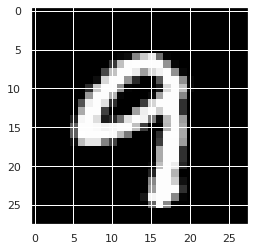

In [11]:
plt.imshow(X_visu[9238].reshape(28,28), cmap='gray')    # reshapes the image in the 9238 position

Grid visualization

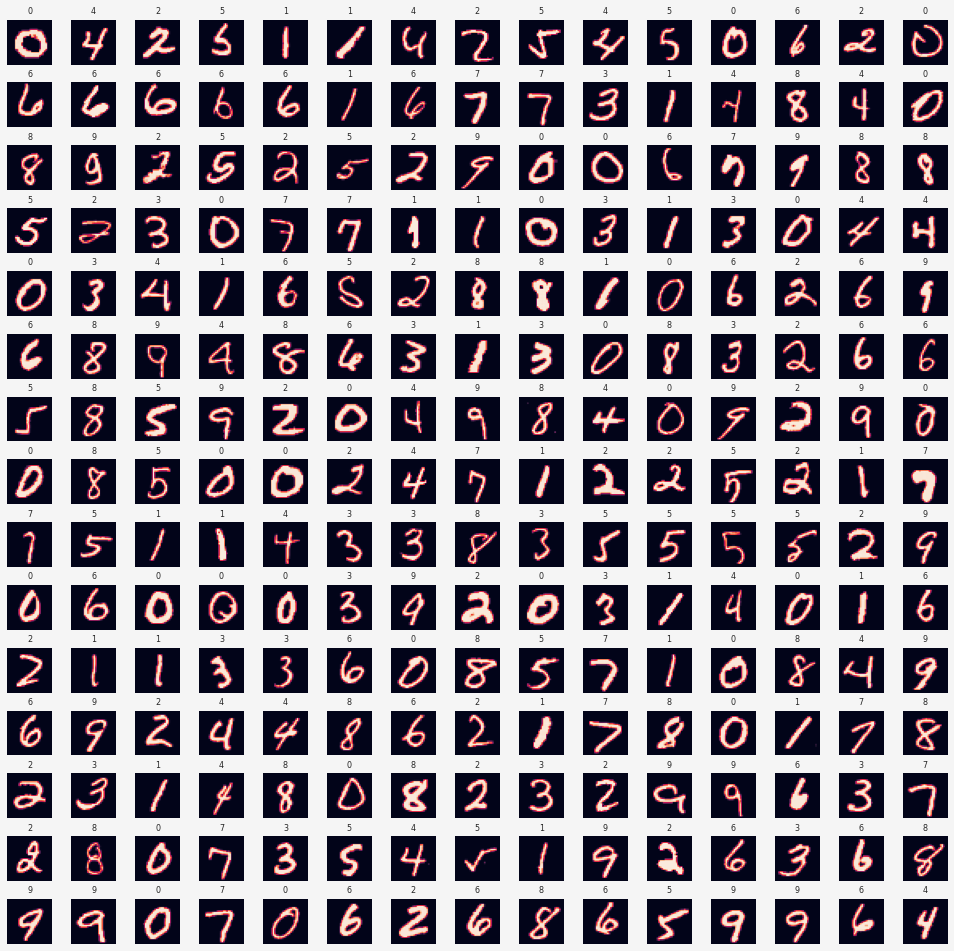

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

fig.patch.set_facecolor('whitesmoke')

axes = axes.ravel()

n_training = len(X_visu) 

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
    axes[i].imshow(X_visu[index].reshape(28,28))
    axes[i].set_title(y[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Creating the train and test datasets

In [13]:
X = df_train.to_numpy()
X_test = df_test.to_numpy()

X = X.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [14]:
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X, y, random_state=0)

### Importing models and metrics

In [36]:
from sklearn.metrics import accuracy_score
#The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

In [64]:
dict_metrics = {'metrics':['Recall', 'Precision', 'F1', 'Accuracy', 'Balanced Accuracy']}

### Support Vector Classifier

In [16]:
svc_model = SVC(decision_function_shape='ovo', cache_size=4000)

In [17]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=4000, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predictions_svc = svc_model.predict(X_validation)

In [40]:
recall_svc = recall_score(y_validation, predictions_svc, average='macro')
precision_svc = precision_score(y_validation, predictions_svc, average='macro')
f1_svc = f1_score(y_validation, predictions_svc, average='macro')
acc_svc = accuracy_score(y_validation, predictions_svc)
bacc_svc = balanced_accuracy_score(y_validation, predictions_svc)

In [67]:
dict_metrics['SVC'] = [recall_svc, precision_svc, f1_svc, acc_svc, bacc_svc]

In [41]:
print('Recall Score:', recall_svc)
print('Precision Score:', precision_svc)
print('F1 Score:', f1_svc)
print('Accuracy Score:', acc_svc)
print('Balanced Accuracy Score:', bacc_svc)

Recall Score: 0.974792908529577
Precision Score: 0.9745633123790242
F1 Score: 0.9746440895530342
Accuracy Score: 0.9748571428571429
Balanced Accuracy Score: 0.974792908529577


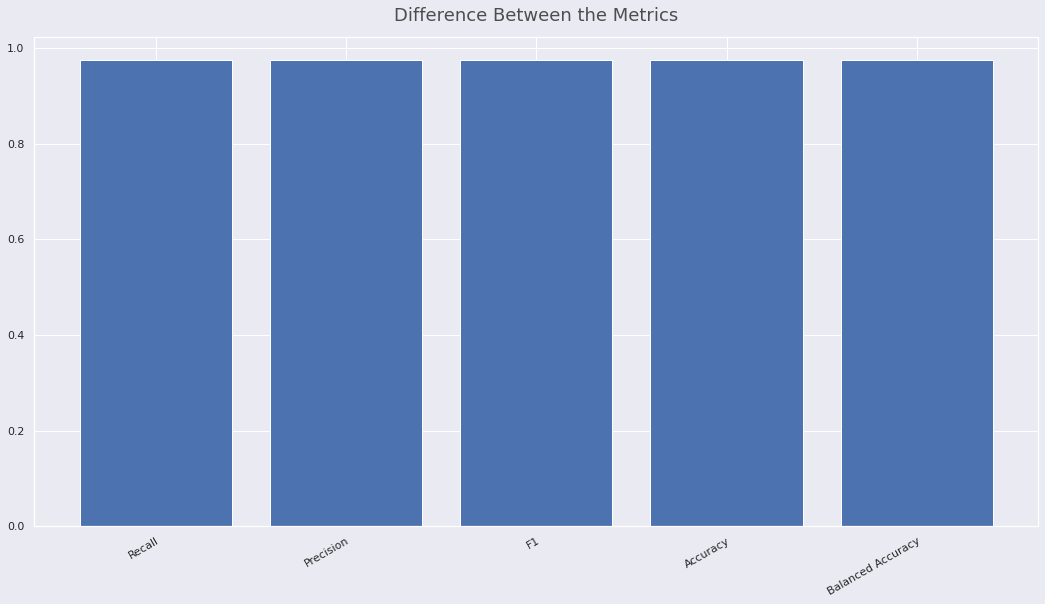

In [54]:
fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor('#eaeaf2')

plt.bar(['Recall', 'Precision', 'F1', 'Accuracy', 'Balanced Accuracy'], 
        [recall_svc, precision_svc, f1_svc, acc_svc, bacc_svc])
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')

plt.title('Difference Between the Metrics',
          size=18, alpha=0.8, y=1.02)
plt.show();

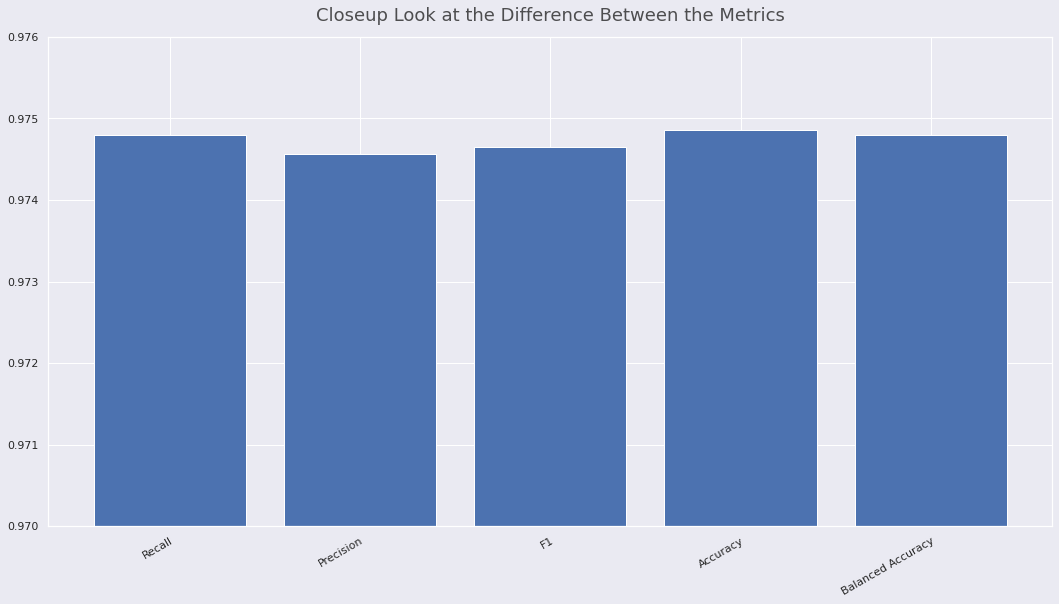

In [55]:
fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor('#eaeaf2')

plt.bar(['Recall', 'Precision', 'F1', 'Accuracy', 'Balanced Accuracy'], 
        [recall_svc, precision_svc, f1_svc, acc_svc, bacc_svc])
plt.ylim([0.97, 0.976])
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')

plt.title('Closeup Look at the Difference Between the Metrics',
          size=18, alpha=0.8, y=1.02)
plt.show();

### K-Neighbors Classifier